# 1. 패키지 임포트

In [1]:
import numpy as np
import pandas as pd
import folium
import pandas_profiling
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
%matplotlib inline
from tqdm import tqdm
import datetime
import json
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

mpl.rc('font', family='binggrae2')
mpl.rc('axes', unicode_minus=True)
pd.options.display.max_columns = 100
pd.options.display.max_rows = 10000

# 2. 데이터 로드

In [2]:
path = 'C:/Users/user/Desktop/TodayLearn/TiL/Code/Project2/Projcet02/1_smart_card_data/'
df = pd.read_csv(f'{path}/smartcard_Chain.csv', encoding = 'cp949')

In [3]:
# 데이터 shape 파악
print(df.shape)

(8206179, 23)


In [4]:
# 데이터 결측치 확인
df.isnull().sum()

card_name               0
Bus                     0
Subway                  0
on_area_name            0
on_lon                  0
on_lat                  0
on_dong                 0
on_hour                 0
on_minute               0
on_second               0
off_area_name           0
off_lon                 0
off_lat                 0
off_dong                0
off_hour                0
off_minute              0
off_second              0
no_transfer             0
total_distance          0
total_time              0
route_id          3398018
Haversine               0
Circuity            72738
dtype: int64

<AxesSubplot:>

findfont: Font family ['binggrae2'] not found. Falling back to DejaVu Sans.
findfont: Font family ['binggrae2'] not found. Falling back to DejaVu Sans.
findfont: Font family ['binggrae2'] not found. Falling back to DejaVu Sans.


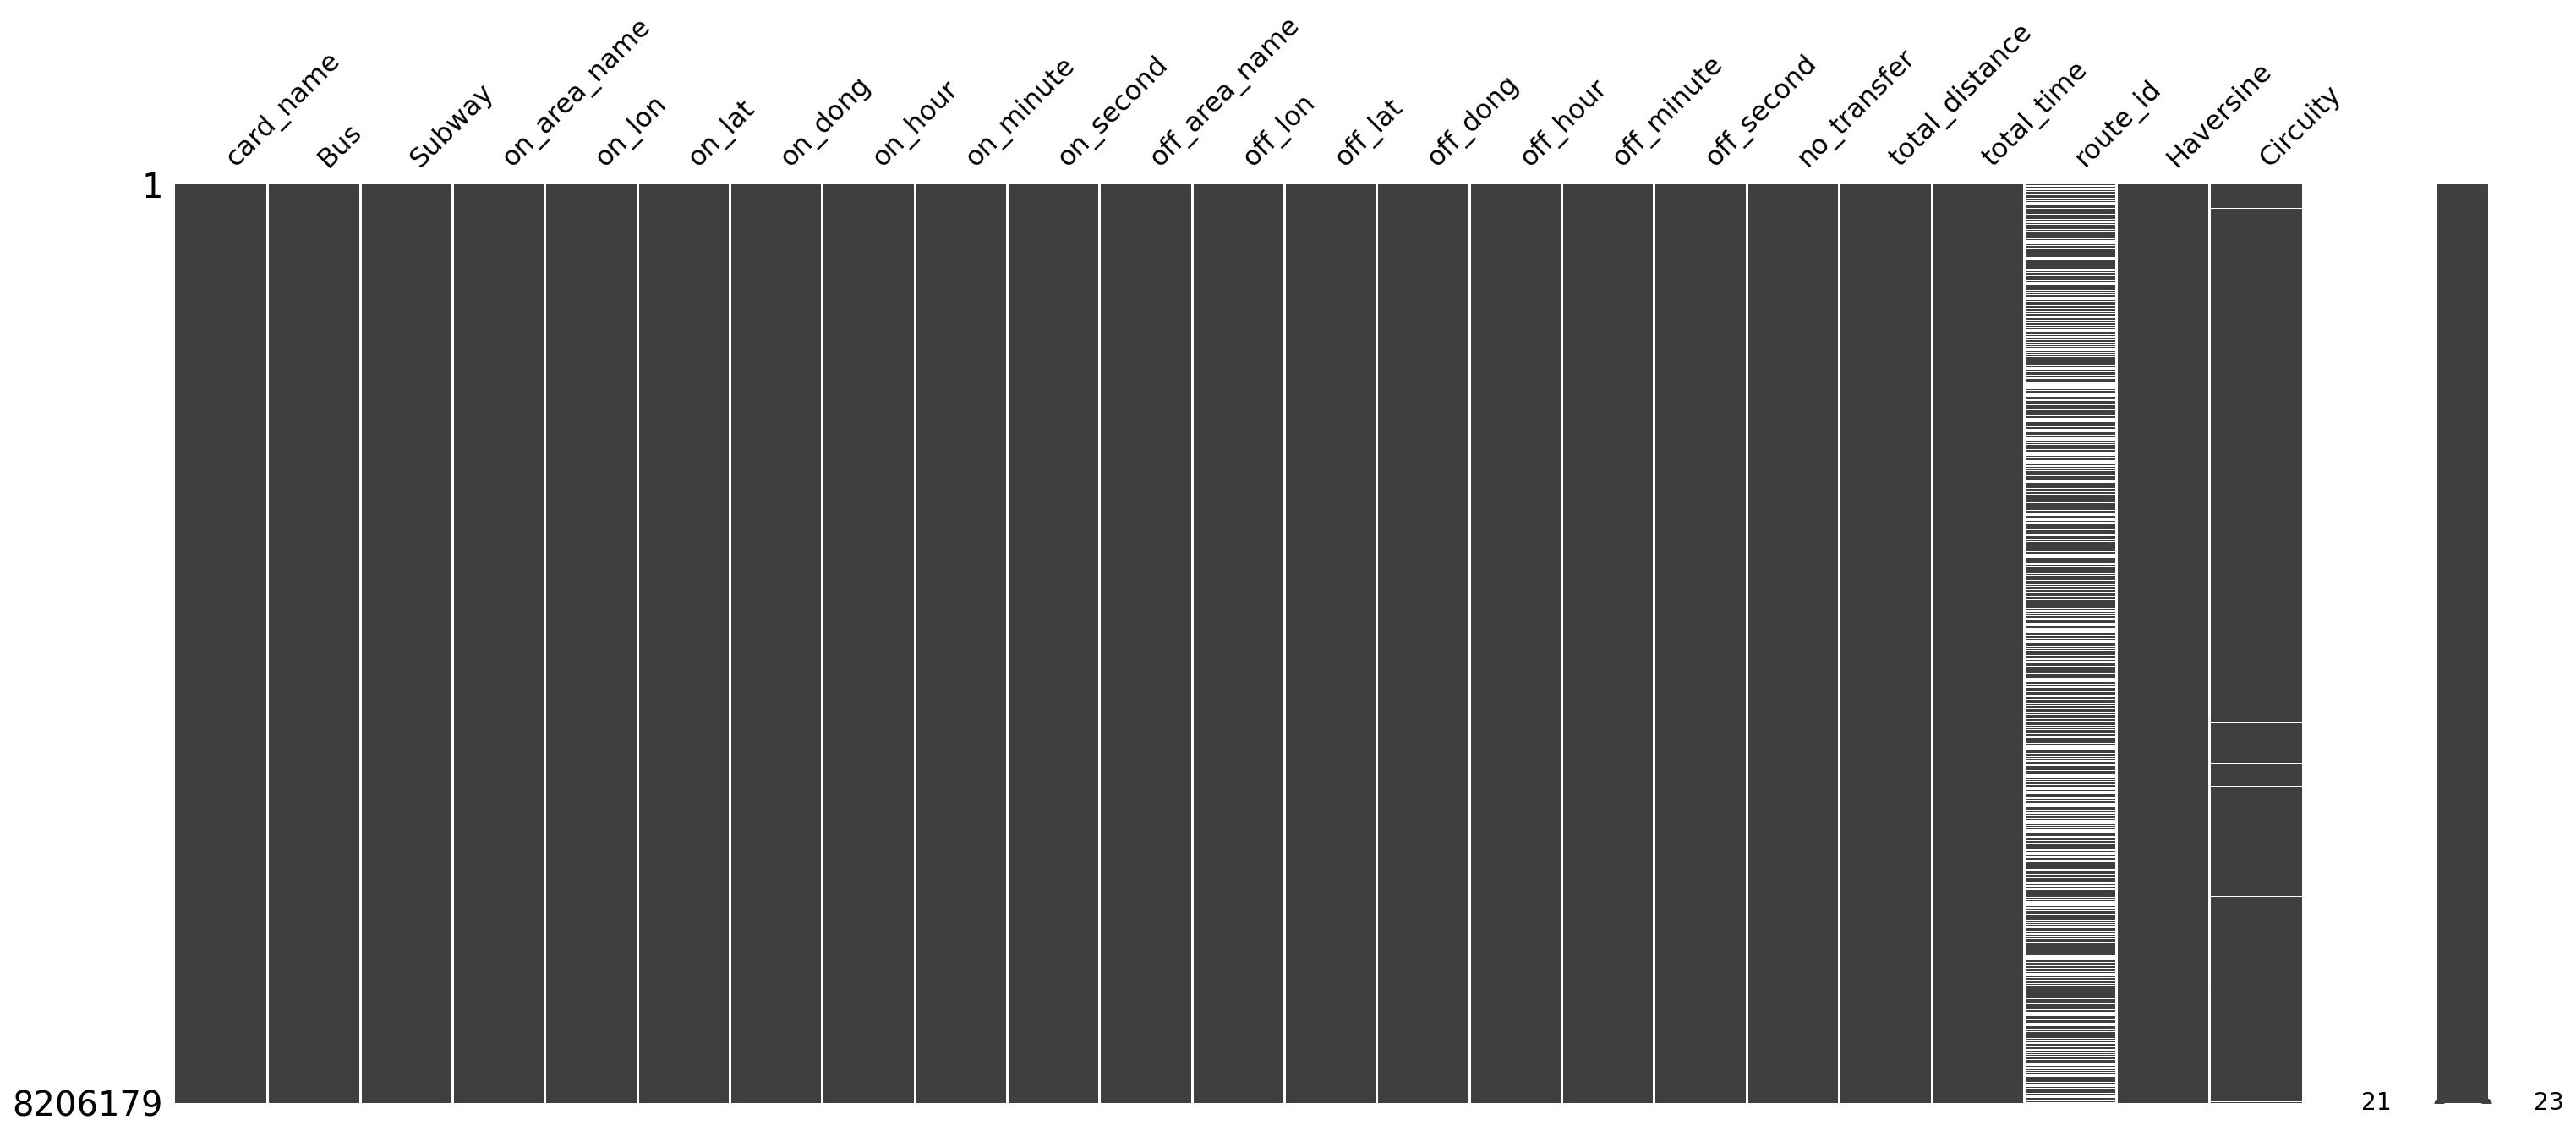

In [5]:
# 데이터 결측치 시각화
msno.matrix(df)

# 3. 데이터 정제
- df : 원본데이터
- df_copy = df.copy()

In [81]:
df_copy = df.copy()

In [82]:
df_copy.head(10)

,card_name,Bus,Subway,on_area_name,on_lon,on_lat,on_dong,on_hour,on_minute,on_second,off_area_name,off_lon,off_lat,off_dong,off_hour,off_minute,off_second,no_transfer,total_distance,total_time,route_id,Haversine,Circuity,on_time
0,+++0VxU0B9DrLE4nxWaOzEArKFNI3ep9kMPVTZVHGNM=,False,True,영등포시장역,126.905118,37.522694,1119074,12,42,8,충무로역,126.993624,37.561135,1102060,13,16,20,0,11000,2052,NaN,8897.367673,1.236321,12:42:8
1,+++0VxU0B9DrLE4nxWaOzEArKFNI3ep9kMPVTZVHGNM=,False,True,충무로역,126.993624,37.561135,1102060,16,2,9,중곡역,127.084283,37.565891,1105057,16,36,50,0,9400,2081,NaN,8008.336598,1.173777,16:2:9
2,+++0VxU0B9DrLE4nxWaOzEArKFNI3ep9kMPVTZVHGNM=,False,True,중곡역,127.084283,37.565891,1105057,18,22,39,선유도역,126.893294,37.538159,1119062,19,19,46,0,20100,3427,NaN,17116.783674,1.174286,18:22:39
3,+++19/4InCnN/eZXlK0pT7oFlp3qEbVXHX4NFSiyAN8=,True,False,LG전자.문래중,126.885883,37.520390,1119076,16,11,56,문래역,126.894412,37.519063,1119076,16,15,3,0,768,187,11110803.0,766.539891,1.001905,16:11:56
4,+++3lFnkOIxAPXhin+oeJBZJeI8l5KOhgxcjhFqGTlc=,True,False,강남구청.강남세무서,127.047293,37.518428,1123078,18,4,57,청담동래미안아파트,127.042912,37.517653,1123078,18,6,30,0,397,93,11110214.0,395.878621,1.002833,18:4:57
5,+++F6kFULTd2oQ7KiAe3olIQ0mzelgLbSx+q6rqtJqA=,True,False,중동초등학교,126.910317,37.566667,1114073,9,12,48,연희104고지앞.구성산회관,126.925082,37.566285,1113076,9,16,56,0,1457,248,11110027.0,1302.056387,1.118999,9:12:48
6,+++F6kFULTd2oQ7KiAe3olIQ0mzelgLbSx+q6rqtJqA=,True,False,홍대입구역,126.923352,37.556790,1114066,13,51,2,성산2교,126.913213,37.563907,1114072,13,55,24,0,1432,262,41110070.0,1193.729520,1.199602,13:51:2
7,+++Mu6n16tNt3pAX8k72E1UlIZXRqojexmEcPIaArto=,False,True,압구정역,127.028481,37.526492,1123077,14,57,34,회현역,126.978434,37.558734,1102052,15,19,1,0,6700,1287,NaN,5685.353574,1.178467,14:57:34
8,+++Mu6n16tNt3pAX8k72E1UlIZXRqojexmEcPIaArto=,False,True,을지로3가역,126.992593,37.566424,1101061,18,1,40,압구정역,127.028481,37.526492,1123077,18,16,6,0,6000,866,NaN,5452.191576,1.100475,18:1:40
9,+++PAYzWTdRTGJKcBiZ1g/w9Ik/WgyDTTve7H410Tbo=,False,True,창동역,127.047672,37.653205,1110063,9,51,57,미아사거리역,127.030084,37.613251,1109072,10,8,24,0,5700,987,NaN,4704.914692,1.211499,9:51:57


In [83]:
df_copy['on_time'] = df_copy['on_hour'].astype(str)+':'+df_copy['on_minute'].astype(str)+':'+df_copy['on_second'].astype(str)
df_copy.head()

,card_name,Bus,Subway,on_area_name,on_lon,on_lat,on_dong,on_hour,on_minute,on_second,off_area_name,off_lon,off_lat,off_dong,off_hour,off_minute,off_second,no_transfer,total_distance,total_time,route_id,Haversine,Circuity,on_time
0,+++0VxU0B9DrLE4nxWaOzEArKFNI3ep9kMPVTZVHGNM=,False,True,영등포시장역,126.905118,37.522694,1119074,12,42,8,충무로역,126.993624,37.561135,1102060,13,16,20,0,11000,2052,NaN,8897.367673,1.236321,12:42:8
1,+++0VxU0B9DrLE4nxWaOzEArKFNI3ep9kMPVTZVHGNM=,False,True,충무로역,126.993624,37.561135,1102060,16,2,9,중곡역,127.084283,37.565891,1105057,16,36,50,0,9400,2081,NaN,8008.336598,1.173777,16:2:9
2,+++0VxU0B9DrLE4nxWaOzEArKFNI3ep9kMPVTZVHGNM=,False,True,중곡역,127.084283,37.565891,1105057,18,22,39,선유도역,126.893294,37.538159,1119062,19,19,46,0,20100,3427,NaN,17116.783674,1.174286,18:22:39
3,+++19/4InCnN/eZXlK0pT7oFlp3qEbVXHX4NFSiyAN8=,True,False,LG전자.문래중,126.885883,37.520390,1119076,16,11,56,문래역,126.894412,37.519063,1119076,16,15,3,0,768,187,11110803.0,766.539891,1.001905,16:11:56
4,+++3lFnkOIxAPXhin+oeJBZJeI8l5KOhgxcjhFqGTlc=,True,False,강남구청.강남세무서,127.047293,37.518428,1123078,18,4,57,청담동래미안아파트,127.042912,37.517653,1123078,18,6,30,0,397,93,11110214.0,395.878621,1.002833,18:4:57


In [84]:
df_copy['Circuity'] = np.where(df_copy['Circuity'] == 0, np.nan, df_copy['Circuity'])
df_copy['Circuity'] = np.where(df_copy['Haversine'] == 0, np.nan, df_copy['Circuity'] )

In [85]:
df_copy.isnull().sum()

card_name               0
Bus                     0
Subway                  0
on_area_name            0
on_lon                  0
on_lat                  0
on_dong                 0
on_hour                 0
on_minute               0
on_second               0
off_area_name           0
off_lon                 0
off_lat                 0
off_dong                0
off_hour                0
off_minute              0
off_second              0
no_transfer             0
total_distance          0
total_time              0
route_id          3398018
Haversine               0
Circuity           114032
on_time                 0
dtype: int64

In [88]:
df_copy.shape

(8206179, 24)

In [89]:
# df_copy[df_copy['Circuity'] >2000] == np.nan
# df_copy.head(5)

,card_name,Bus,Subway,on_area_name,on_lon,on_lat,on_dong,on_hour,on_minute,on_second,off_area_name,off_lon,off_lat,off_dong,off_hour,off_minute,off_second,no_transfer,total_distance,total_time,route_id,Haversine,Circuity,on_time


In [59]:
df2 = df_copy[(df_copy['Circuity'] <= 10) & (df_copy['Circuity'] > 0)]

In [90]:
df_copy['route_id'].replace(np.nan, -1, inplace = True)

In [91]:
df_copy.dropna(inplace = True)

In [92]:
df_copy.isnull().sum()

card_name         0
Bus               0
Subway            0
on_area_name      0
on_lon            0
on_lat            0
on_dong           0
on_hour           0
on_minute         0
on_second         0
off_area_name     0
off_lon           0
off_lat           0
off_dong          0
off_hour          0
off_minute        0
off_second        0
no_transfer       0
total_distance    0
total_time        0
route_id          0
Haversine         0
Circuity          0
on_time           0
dtype: int64

In [97]:
df_copy[df_copy['Circuity'] > 10].head(10)

,card_name,Bus,Subway,on_area_name,on_lon,on_lat,on_dong,on_hour,on_minute,on_second,off_area_name,off_lon,off_lat,off_dong,off_hour,off_minute,off_second,no_transfer,total_distance,total_time,route_id,Haversine,Circuity,on_time
55,++/wPrFybiQiZVjn0QEZpNxMQ5tJuhYl5EBoQIU+OuQ=,True,False,미림여고.미림여자정보과학고,126.931333,37.465575,1121082,12,9,14,신우초등학교,126.931980,37.462322,1121082,12,56,12,2,7758,1888,11110912.0,366.197322,21.185300,12:9:14
1026,++TWA5N+lGMi8nXa7zuNZ6bbANK0b3AgTKly2ut3wzI=,True,False,구로4동우체국.고대구로병원정문,126.884217,37.490372,1117055,19,9,55,구로4동우체국.고대구로병원정문,126.884095,37.489860,1117071,19,50,53,1,1982,657,11110054.0,57.940492,34.207511,19:9:55
1248,++a5ImjmJKzJlSonE97O1tjk1D8zWTVq3W2pk28YvLc=,True,False,의릉입구,127.062165,37.603480,1106089,15,24,30,의릉입구,127.061940,37.603932,1106089,15,41,23,1,1297,304,11110970.0,54.027458,24.006312,15:24:30
1465,++hPZgI1dDUh2KC/Ow4fcusYxG6XVxdQjl1pwdV/Vwc=,True,False,만안구청,126.931215,37.387320,3104156,17,37,53,만안구청,126.930997,37.387080,3104156,18,16,43,1,2599,579,41110044.0,32.911186,78.970110,17:37:53
2150,+/0rpYi71nq8cxB1B+SQSLTF5Kjl1g5XDJLJticRlH0=,True,False,한티역,127.052142,37.498165,1123065,9,28,44,예림당아트홀.신한은행전산센터,127.044293,37.498223,1123065,10,17,58,1,8022,2581,11110420.0,692.461922,11.584753,9:28:44
2172,+/1ocBEpzsl33qoxqINfCuCckhjBf7SaTBzQYEQmamo=,True,False,방약국앞,127.085740,37.575997,1107054,18,23,26,용마산역,127.086662,37.573423,1107054,19,27,24,3,9404,2040,11110979.0,297.526451,31.607274,18:23:26
2202,+/3CXVqOGPs1XLrzVfIJxIw/NoBMR9twtrT82bK1IqQ=,True,True,신창동세방아파트,126.954955,37.535708,1103057,8,17,57,신창동세방아파트,126.954892,37.535837,1103057,9,7,47,4,6219,1714,11110897.0,15.382236,404.297534,8:17:57
2364,+/8dbe4qhOgeo+VrYzJ/fEe50hAxsVWaVo/Z/B7zS2Q=,True,False,천주교성령봉사회관.등불교회,126.907893,37.480792,1121072,8,11,48,KT구로지사,126.905593,37.479983,1118054,9,0,17,2,3790,947,41110043.0,221.995242,17.072438,8:11:48
2465,+/CdP1eKIPG0B+GL5vCzY4QsfkOq4BEKGEQfiLt/AXg=,True,False,숭례초교,127.035692,37.594807,1108084,13,6,21,숭례초등학교,127.036180,37.594357,1108084,14,55,11,2,18276,6186,11110015.0,65.972540,277.024352,13:6:21
4384,+07Nwp8v6L0UJxzz+5RpZVDZZoCm3uY54bS4Vke7ltI=,True,False,경방타임스퀘어.신세계백화점,126.906220,37.517540,1119074,14,12,49,김안과병원,126.903037,37.520118,1119074,15,23,49,2,8550,2552,11110808.0,401.223581,21.309814,14:12:49


In [100]:
#직선거리 < 총거리 => 나는 돌아서 갔습니다. 오래걸렸습니다.
# 직선거리 > 총거리 => 나는 돌아서 안갔습니다. 빨리갔네요..

df_copy[df_copy['no_transfer'] >= 4].head(10)

,card_name,Bus,Subway,on_area_name,on_lon,on_lat,on_dong,on_hour,on_minute,on_second,off_area_name,off_lon,off_lat,off_dong,off_hour,off_minute,off_second,no_transfer,total_distance,total_time,route_id,Haversine,Circuity,on_time
1124,++WHGIHXkADngbmYHfYiN4EJjKCNboUl86RNUV352r0=,True,False,정릉시장입구,127.009848,37.608513,1108065,20,54,37,청덕초교,127.000060,37.608630,1108064,22,29,24,4,8532,1755,11110113.0,862.308969,9.894365,20:54:37
2202,+/3CXVqOGPs1XLrzVfIJxIw/NoBMR9twtrT82bK1IqQ=,True,True,신창동세방아파트,126.954955,37.535708,1103057,8,17,57,신창동세방아파트,126.954892,37.535837,1103057,9,7,47,4,6219,1714,11110897.0,15.382236,404.297534,8:17:57
2233,+/45TswubnkkLU1KuE8ffU1zsreIHgeaOMfWY4CJzZo=,True,False,금란교회,127.103948,37.600513,1107073,8,33,18,왕십리도선동청사앞,127.024413,37.567817,1104071,9,47,51,4,11191,2905,11110032.0,7895.302989,1.417425,8:33:18
3521,+/ikofz4CdqXESipd1ktNlFl1fG1zFUfLDPIRLPjwnA=,True,False,경동시장앞,127.038768,37.582130,1106082,13,40,36,경남아파트,127.034060,37.616710,1109071,14,20,42,4,4767,1367,11110010.0,3867.431804,1.232601,13:40:36
4119,+0+npQ1+nwXNp0GWu0yK2+6VH39dVYBynlJOrvjrFkI=,True,False,반포역,127.011893,37.508413,1122055,21,42,48,고속터미널,127.005137,37.506295,1122060,21,46,24,4,640,216,11110224.0,640.784177,0.998776,21:42:48
4156,+00EpJw+nPytYG/ttpQyviOIsGBTbW7uFvBnrNapkSI=,True,False,흥안운수종점,127.080593,37.669670,1111076,20,7,11,수락산역3번출구,127.055527,37.677065,1111065,20,34,16,4,4226,894,11110169.0,2354.367556,1.794962,20:7:11
4887,+0NiNa+M12CFoArXJL7DTCxHZWfQUkR2okbkS2mUbOc=,True,False,이문동현대아파트앞,127.070937,37.601317,1106090,22,9,55,이문동쌍용아파트,127.069118,37.598832,1106090,0,9,55,4,18791,4939,11110945.0,319.426246,58.827351,22:9:55
5051,+0Sor35K4W6g+QDMcbEOUnAv9A9CHR3aEuF2bmGzZbc=,True,True,서울역공항철도4번출구.국립극단,126.968907,37.553108,1103071,14,53,4,당산역,126.902618,37.534781,1119056,16,34,31,4,14338,2983,11110032.0,6189.475967,2.316513,14:53:4
6418,+19knWA7Sc2QE7MKfnnEHhdOd+1MjpcHEGqgNdbD7aU=,True,True,금남시장앞.백범학원터,127.021647,37.548280,1104062,16,59,37,구.영동중학교후문,127.029042,37.486753,1122052,18,16,41,4,11892,2974,11110677.0,6872.517586,1.730370,16:59:37
7057,+1UanzPrZfSd9s1OtcO1Q7URt5fCO4HWQ+1ZNVgY/A0=,False,True,증미역,126.860630,37.558124,1116066,12,23,59,종로5가역,127.001549,37.570964,1101063,13,21,45,4,15700,3466,-1.0,12502.484474,1.255750,12:23:59
